In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Delhi+Delights+Data.csv')

In [3]:
df.head(3)

,Average Delivery Rating (a1),Average Orders per month (a2),"""Delighted Members"" Purchase"
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No


In [4]:
df.columns

Index(['Average Delivery Rating (a1)', 'Average Orders per month (a2)',
       '"Delighted Members" Purchase'],
      dtype='object')

In [5]:
# Putting feature variable to X
X = df.drop('"Delighted Members" Purchase',axis=1)

# Putting response variable to y
y = df['"Delighted Members" Purchase']

In [6]:
from sklearn.model_selection import train_test_split

##, random_state=10

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.99)
X_train.shape, X_test.shape

## , random_state=5

((29, 2), (1, 2))

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [10]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

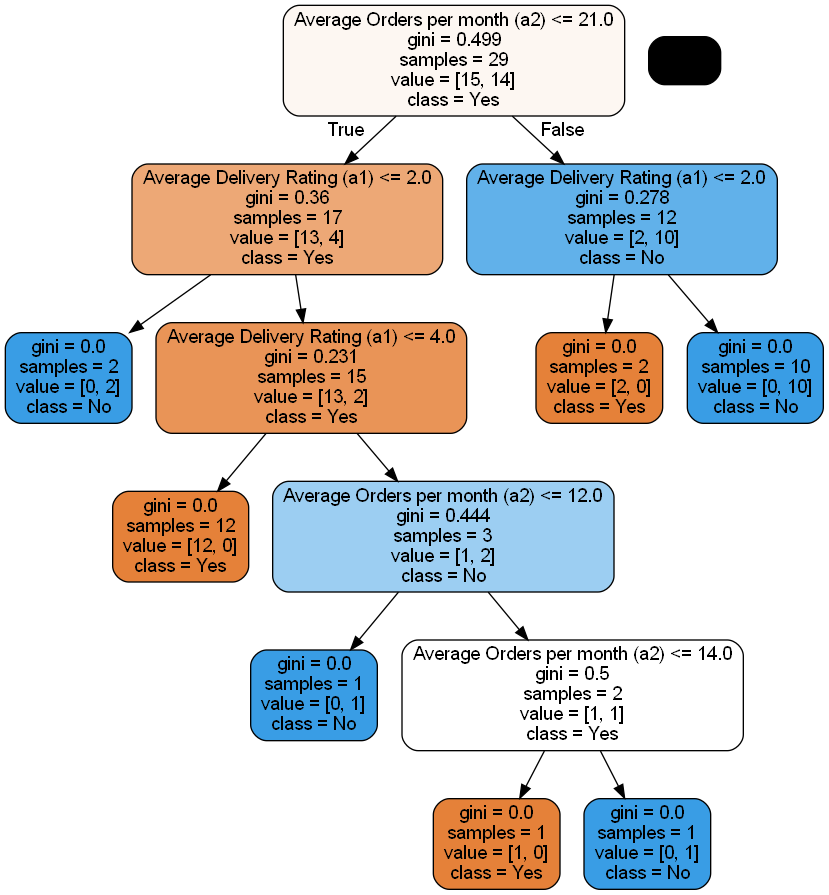

In [11]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Yes', "No"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())
Image(graph.create_png(),width=600,height=700)


In [12]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[15,  0],
       [ 0, 14]], dtype=int64)

In [15]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

1.0


array([[1]], dtype=int64)

In [16]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Yes', "No"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [17]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [18]:
evaluate_model(dt)

Train Accuracy : 1.0
Train Confusion Matrix:
[[15  0]
 [ 0 14]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[1]]


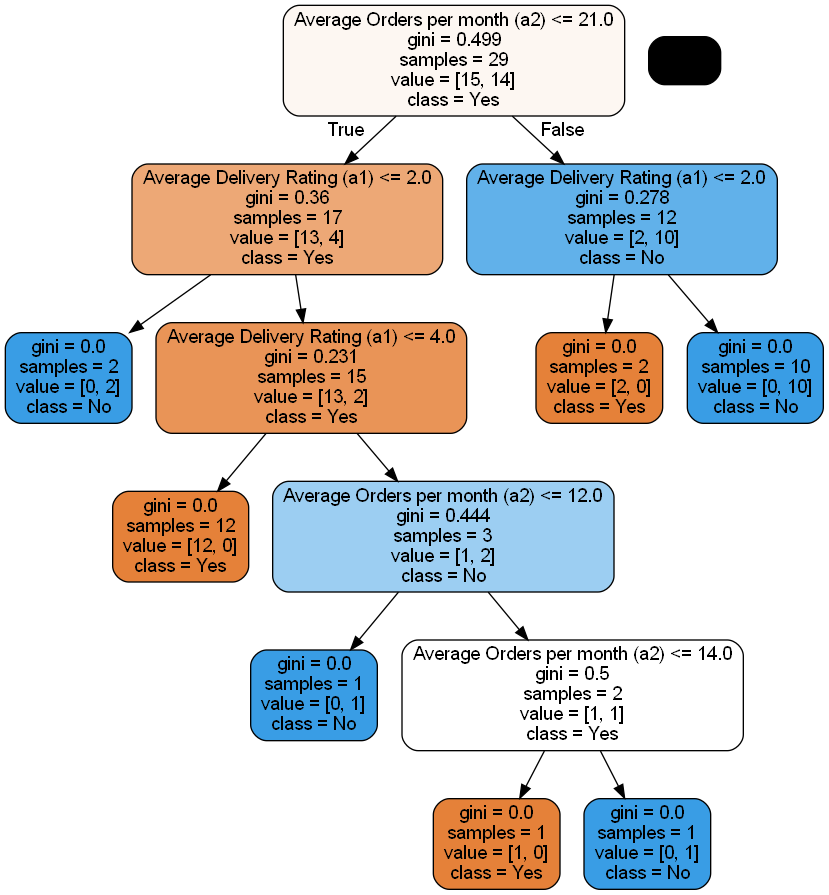

In [19]:
gph = get_dt_graph(dt)
Image(gph.create_png())

In [20]:
## no parameters

In [21]:
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

# random_state=5

DecisionTreeClassifier()

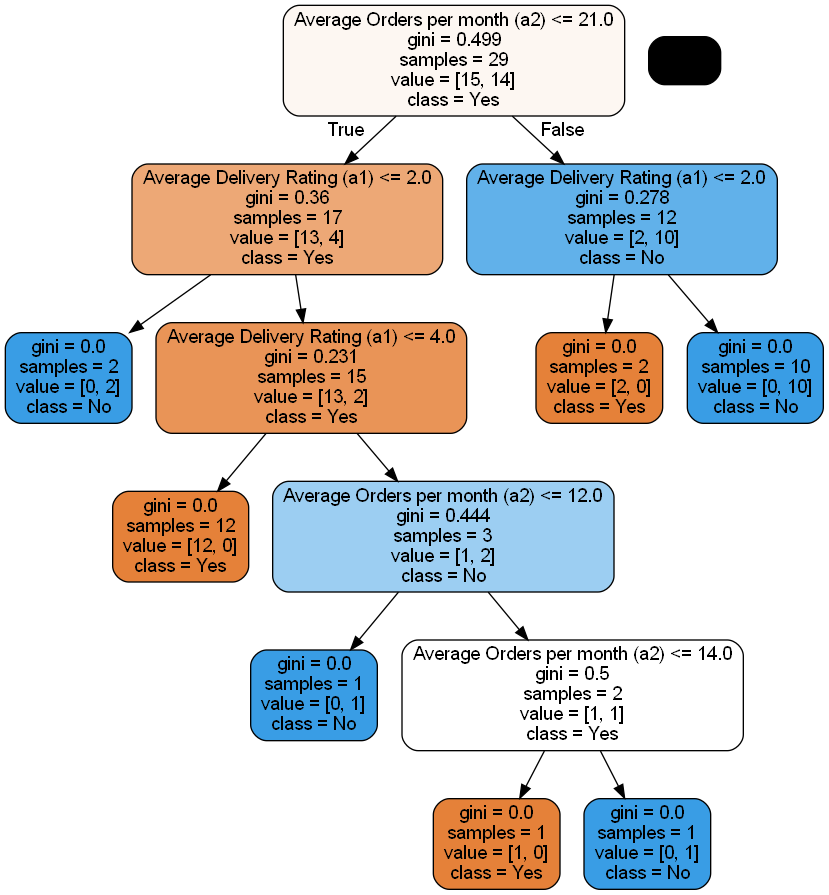

In [22]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [23]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[15  0]
 [ 0 14]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[1]]


In [24]:
### max depth 5

In [25]:
dt_depth = DecisionTreeClassifier(max_depth=5)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

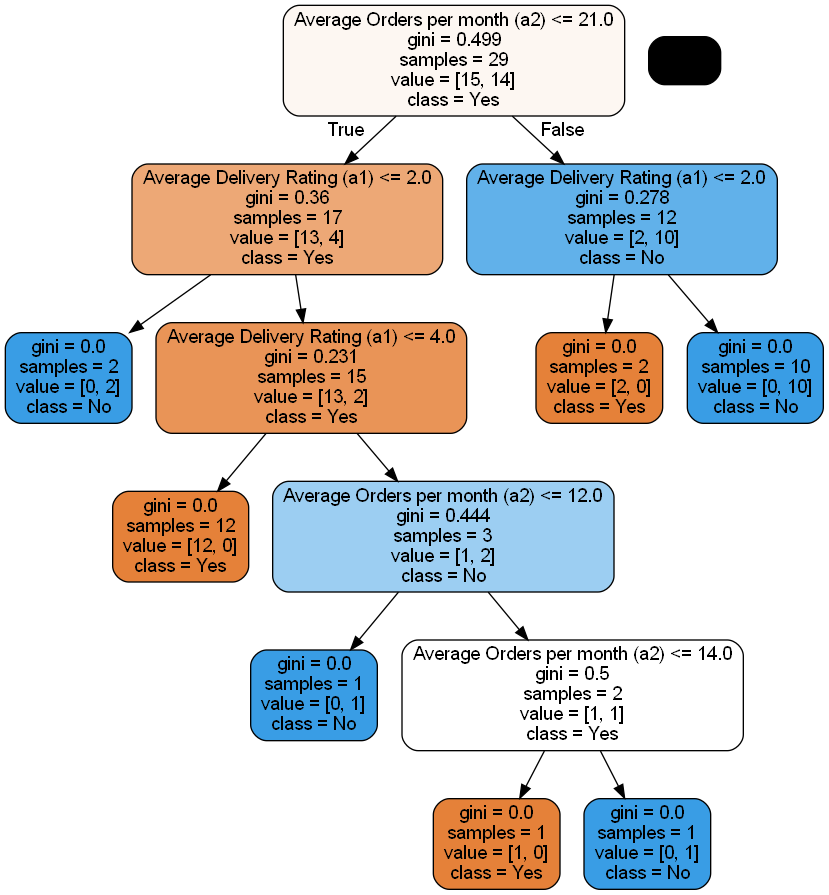

In [26]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [27]:
evaluate_model(dt_depth)

Train Accuracy : 1.0
Train Confusion Matrix:
[[15  0]
 [ 0 14]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[1]]


In [28]:
## min sample split

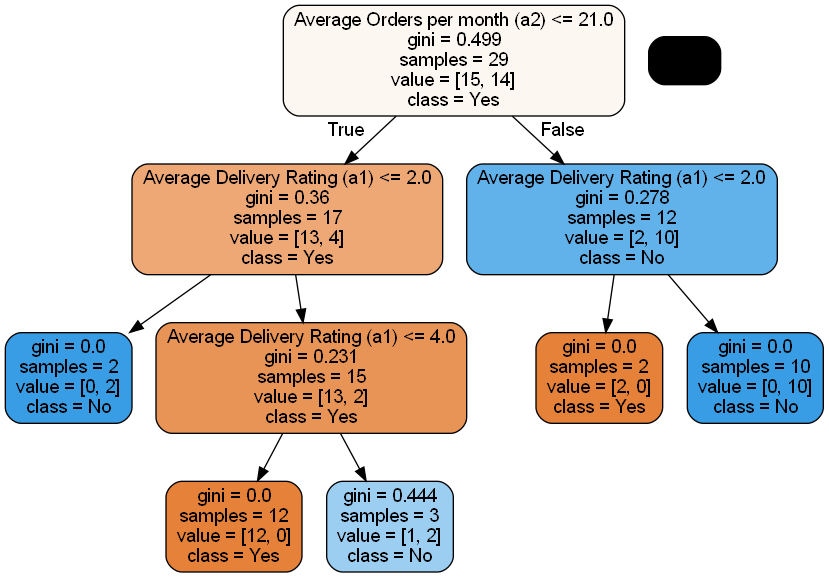

In [29]:
dt_min_split = DecisionTreeClassifier(min_samples_split=10)
dt_min_split.fit(X_train, y_train)

gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [30]:
evaluate_model(dt_min_split)

Train Accuracy : 0.9655172413793104
Train Confusion Matrix:
[[14  1]
 [ 0 14]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[1]]


In [31]:
## min sample leaf

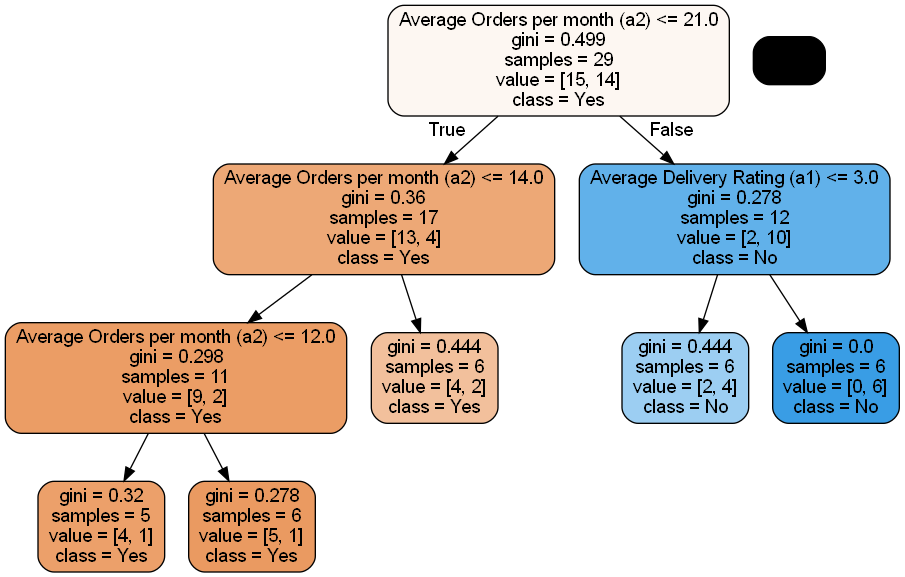

In [32]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=5)
dt_min_leaf.fit(X_train, y_train)

gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

# ,random_state=5

In [33]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7931034482758621
Train Confusion Matrix:
[[13  2]
 [ 4 10]]
--------------------------------------------------
Test Accuracy : 0.0
Test Confusion Matrix:
[[0 0]
 [1 0]]


In [34]:
## using Gini

In [35]:
dt_min_leaf_gini = DecisionTreeClassifier(min_samples_leaf=5, criterion="gini")
dt_min_leaf_gini.fit(X_train, y_train)

# , random_state=5

DecisionTreeClassifier(min_samples_leaf=5)

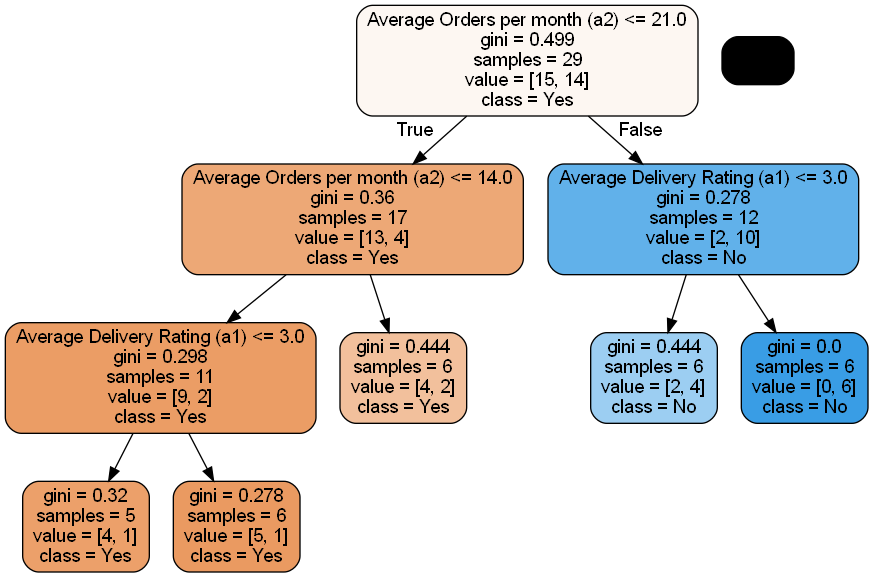

In [36]:
gph = get_dt_graph(dt_min_leaf_gini)
Image(gph.create_png())

In [37]:
evaluate_model(dt_min_leaf_gini)

Train Accuracy : 0.7931034482758621
Train Confusion Matrix:
[[13  2]
 [ 4 10]]
--------------------------------------------------
Test Accuracy : 0.0
Test Confusion Matrix:
[[0 0]
 [1 0]]
